In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d prashanthbairu/delaney-solubility-with-descriptors

Dataset URL: https://www.kaggle.com/datasets/prashanthbairu/delaney-solubility-with-descriptors
License(s): unknown


In [29]:
import zipfile
zip_ref=zipfile.ZipFile(r"/content/delaney-solubility-with-descriptors.zip")
zip_ref.extractall('Projects')
zip_ref.close()

In [30]:
import pandas as pd

In [31]:
data=pd.read_csv(r"/content/Projects/delaney_solubility_with_descriptors.csv")
data.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


In [32]:
data.isnull().sum()

,0
MolLogP,0
MolWt,0
NumRotatableBonds,0
AromaticProportion,0
logS,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB


In [34]:
data.describe()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,2.449133,204.631675,2.173951,0.364932,-3.057997
std,1.866003,102.620500,2.627398,0.343305,2.096502
min,-7.571400,16.043000,0.000000,0.000000,-11.600000
25%,1.414900,122.126000,0.000000,0.000000,-4.332250
50%,2.340300,183.594500,1.000000,0.375000,-2.870500
75%,3.406475,270.715750,3.000000,0.666667,-1.600000
max,10.388600,780.949000,23.000000,1.000000,1.580000


In [35]:
X=data.drop('logS',axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [36]:
y=data.iloc[:,-1]
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


**Linear Regression model**

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

In [45]:
model=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
model.fit(x_train,y_train)

LinearRegression()

In [50]:
import numpy as np
prediction=model.predict(x_test)
print("coficient:",model.coef_)
print("intercept:",model.intercept_)
print("r2_score:",r2_score(y_test,prediction))
print("mse:",np.sqrt(mean_squared_error(y_test,prediction)))


coficient: [-1.37334077 -0.6938908   0.01343525 -0.17077438]
intercept: -3.074689617486339
r2_score: 0.7718509906323175
mse: 0.9967369589342157


Data Visualization (Experimental vs Predicted LogS for Training Data)


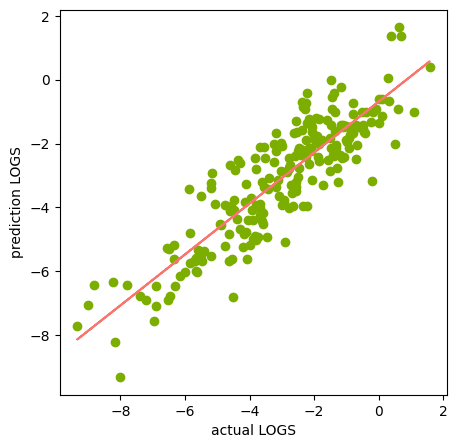

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(y_test,prediction,c="#7CAE00")
z=np.polyfit(y_test,prediction,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")
plt.ylabel("prediction")
plt.xlabel("actual LOGS")
plt.ylabel("prediction LOGS")
plt.show()

save model as pickel object

In [56]:
import pickle
pickle.dump(model,open("model.pkl","wb"))